In [37]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import sklearn 
from sklearn.linear_model import LogisticRegression
ds=pd.read_csv("datasets_HR/HR_comma_sep.csv")
ds.head(5)
ds.tail(5)
ds.dtypes
ds.describe().T
ds.describe(include=['object'])
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [2]:
ds['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [3]:
ds.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
#The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.
#The average monthly work hours of employees who left the company is more than that of the employees who stayed.
#The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
#The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years

In [4]:
ds.groupby('Department').mean()   #in department we found thathr and technical portion left the company
                                   # mostly

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [5]:
ds.groupby('salary').mean()  #low salary portion left the most

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [10]:
leftds=ds[ds['left']==1]
notleftds=ds[ds['left']==0]
leftds
print(leftds.shape)
print(notleftds.shape)

(3571, 10)
(11428, 10)


C:\Users\Hp\anacond\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


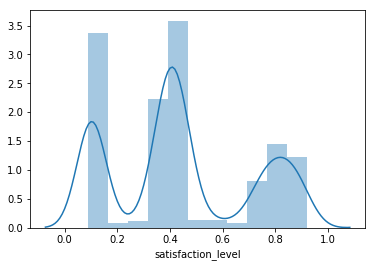

In [11]:
sns.distplot(leftds['satisfaction_level'])

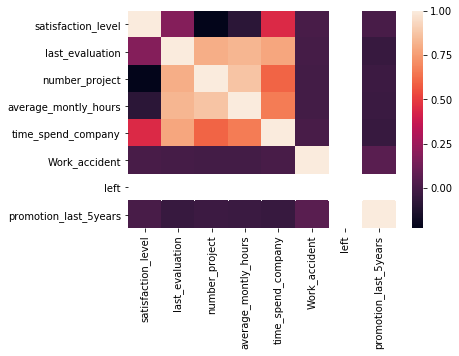

In [12]:
corr=leftds.corr()      #used to build the correlation between the aatributes value and left valuesS
sns.heatmap(corr)

In [13]:
corr=leftds.drop(labels='left',axis=1).corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,0.182295,-0.227113,-0.084117,0.446440,0.005864,0.005516
last_evaluation,0.182295,1.000000,0.804155,0.830336,0.783873,-0.001875,-0.047992
number_project,-0.227113,0.804155,1.000000,0.875194,0.601989,-0.008401,-0.032301
average_montly_hours,-0.084117,0.830336,0.875194,1.000000,0.664011,-0.009048,-0.035475
time_spend_company,0.446440,0.783873,0.601989,0.664011,1.000000,0.005222,-0.045888
Work_accident,0.005864,-0.001875,-0.008401,-0.009048,0.005222,1.000000,0.056214
promotion_last_5years,0.005516,-0.047992,-0.032301,-0.035475,-0.045888,0.056214,1.000000


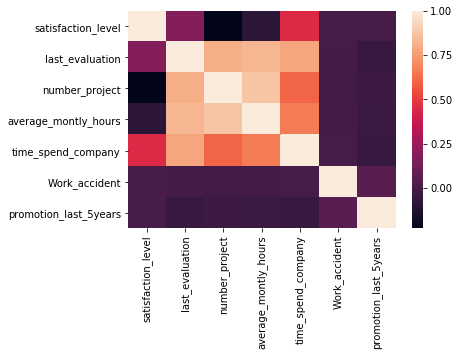

In [14]:
sns.heatmap(corr)     #by heatmap(corr) we found that lastevaluation,number of project and promotionlast5yrs are major factor of employee company leaving 

In [15]:
ds.salary=ds.salary.map({'low':0,'medium':1,'high':2})
ds.salary.head(5)
x=ds.drop(['left','Department'],axis=1)
y=ds['left']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
X_test
from sklearn.linear_model import LogisticRegression        #use of logistic  regression
model=LogisticRegression()
model.fit(X_train,y_train)
ypred=model.predict(X_test)
print(model.score(X_test,y_test))
model.predict_proba(X_test)

0.7983333333333333


array([[0.54895293, 0.45104707],
       [0.81274571, 0.18725429],
       [0.41094217, 0.58905783],
       ...,
       [0.97520889, 0.02479111],
       [0.66469779, 0.33530221],
       [0.44375925, 0.55624075]])

In [24]:
ds.salary=ds.salary.map({'low':0,'medium':1,'high':2})
print(ds.salary.head(5))
from sklearn.preprocessing import LabelEncoder
le_salary=LabelEncoder()
ds['salary_n']=le_salary.fit_transform(ds['salary'])
ds_n=ds.drop(['salary'],axis=1)
print(ds_n.head(4))
x=ds_n.drop(['left','Department'],axis=1)
print(x.head(4))
y=ds_n['left']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
X_test

from sklearn.ensemble import RandomForestClassifier                  #use of randomforest method
model=RandomForestClassifier(n_estimators=30)
model.fit(X_train,y_train)
model.score(X_test,y_test)
ypred=model.predict(X_test)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: salary, dtype: float64
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   

   salary_n  
0         0  
1      9990  
2      9991  
3      9992  
   satisfaction_level  last_evaluation  number_project  ave

0.993

In [25]:
ds.salary=ds.salary.map({'low':0,'medium':1,'high':2})
print(ds.salary.head(5))
from sklearn.preprocessing import LabelEncoder
le_salary=LabelEncoder()
ds['salary_n']=le_salary.fit_transform(ds['salary'])
ds_n=ds.drop(['salary'],axis=1)
print(ds_n.head(4))
x=ds_n.drop(['left','Department'],axis=1)
print(x.head(4))
y=ds_n['left']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
X_test
from sklearn import tree
model=tree.DecisionTreeClassifier()    #use of decisiontree
model.fit(X_train,y_train)
model.score(X_test,y_test)
ypred=model.predict(X_test)


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: salary, dtype: float64
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   

   salary_n  
0         0  
1      9990  
2      9991  
3      9992  
   satisfaction_level  last_evaluation  number_project  ave

0.9916666666666667

In [39]:
from sklearn.preprocessing import LabelEncoder
le_salary=LabelEncoder()
ds['salary_n']=le_salary.fit_transform(ds['salary'])
ds_n=ds.drop(['salary'],axis=1)
print(ds_n.head(4))
x=ds_n.drop(['left','Department'],axis=1)
print(x.head(4))
y=ds_n['left']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
X_test
from sklearn.svm import SVC          #use of svm
model=SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)
ypred=model.predict(X_test)

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   

   salary_n  
0         0  
1         1  
2         1  
3         0  
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53          

0.9553333333333334

In [7]:
#Here classification_report  and accuracy_score.
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import sklearn 
from sklearn.linear_model import LogisticRegression
ds=pd.read_csv("datasets_HR/HR_comma_sep.csv")
ds.head(5)
ds.tail(5)
ds.dtypes
ds.describe().T
ds.describe(include=['object'])
ds.info()
ds.salary=ds.salary.map({'low':0,'medium':1,'high':2})
ds.salary.head(5)
x=ds.drop(['left','Department'],axis=1)
y=ds['left']
ypred=[]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
X_test
from sklearn.linear_model import LogisticRegression        #use of logistic  regression
model=LogisticRegression()
model.fit(X_train,y_train)
ypred=model.predict(X_test)
print("Logisticregression Model score:",model.score(X_test,y_test))
model.predict_proba(X_test)

from sklearn.preprocessing import LabelEncoder
le_salary=LabelEncoder()
ds['salary_n']=le_salary.fit_transform(ds['salary'])
ds_n=ds.drop(['salary'],axis=1)
print(ds_n.head(4))
x=ds_n.drop(['left','Department'],axis=1)
print(x.head(4))
y=ds_n['left']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
X_test
from sklearn.ensemble import RandomForestClassifier                  #use of randomforest method
model=RandomForestClassifier(n_estimators=30)
model.fit(X_train,y_train)
print("RandomForest Model score:",model.score(X_test,y_test))
ypred=model.predict(X_test)

from sklearn.preprocessing import LabelEncoder
le_salary=LabelEncoder()
ds['salary_n']=le_salary.fit_transform(ds['salary'])
ds_n=ds.drop(['salary'],axis=1)
print(ds_n.head(4))
x=ds_n.drop(['left','Department'],axis=1)
print(x.head(4))
y=ds_n['left']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
X_test
from sklearn import tree
model=tree.DecisionTreeClassifier()                             #use of decisiontree
model.fit(X_train,y_train)
print("Decisiontree Model score:",model.score(X_test,y_test))
ypred=model.predict(X_test)

from sklearn.preprocessing import LabelEncoder
le_salary=LabelEncoder()
ds['salary_n']=le_salary.fit_transform(ds['salary'])
ds_n=ds.drop(['salary'],axis=1)
print(ds_n.head(4))
x=ds_n.drop(['left','Department'],axis=1)
print(x.head(4))
y=ds_n['left']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
X_test
from sklearn.svm import SVC                                          #use of svm
model=SVC()
model.fit(X_train,y_train)
print("SVM Model score:",model.score(X_test,y_test))
ypred=model.predict(X_test)


from sklearn.metrics import classification_report,accuracy_score
print("accuracyscore is:",accuracy_score(y_test,ypred))
print("classificationreport is:",classification_report(y_test,ypred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
Logisticregression Model score: 0.8036666666666666
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                  